# Normalisation and outliers

To get started, let's explore the data.

In [4]:
import sklearn.datasets as ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = ds.load_boston()
X = pd.DataFrame(data = dataset['data'], columns = dataset['feature_names'])
print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Normalisation

Both normalisation techniques can be brought up as objects: ```MinMaxScaler``` and ```StandardScaler```. These have built-in functions that apply the transformation ```fit_transform``` which returns the transformed input.

### Min-max scaling

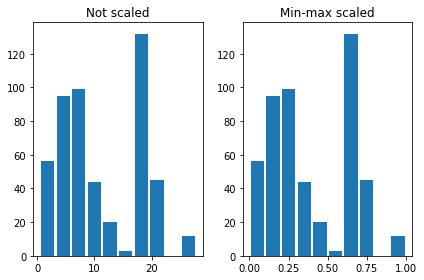

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64
 
count    506.000000
mean       0.391378
std        0.251479
min        0.000000
25%        0.173387
50%        0.338343
75%        0.646628
max        1.000000
Name: INDUS, dtype: float64


In [7]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
var_norm = mms.fit_transform(X)

# Create dataframe out of result so we can use .describe() later
var_norm_df = pd.DataFrame(data = var_norm, columns = X.columns)

plt.subplot(1, 2, 1) 
plt.hist(x=X['INDUS'], bins='auto', rwidth=0.85)
plt.title('Not scaled')

plt.subplot(1, 2, 2) 
plt.hist(x=var_norm_df['INDUS'], bins='auto', rwidth=0.85)
plt.title('Min-max scaled')
plt.tight_layout()
plt.show()

print(X['INDUS'].describe())
print(" ")
print(var_norm_df['INDUS'].describe())

Notice how the x-axis now has different values.

### Standardisation

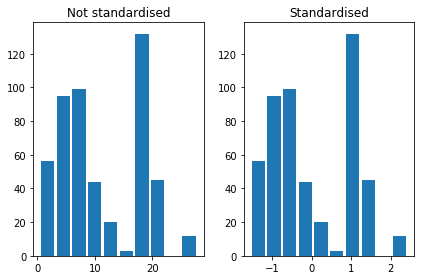

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64
 
count    5.060000e+02
mean    -3.145486e-15
std      1.000990e+00
min     -1.557842e+00
25%     -8.676906e-01
50%     -2.110985e-01
75%      1.015999e+00
max      2.422565e+00
Name: INDUS, dtype: float64


In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
var_norm = ss.fit_transform(X)
var_norm_df = pd.DataFrame(data = var_norm, columns = X.columns)

plt.subplot(1, 2, 1) 
plt.hist(x=X['INDUS'], bins='auto', rwidth=0.85)
plt.title('Not standardised')

plt.subplot(1, 2, 2) 
plt.hist(x=var_norm_df['INDUS'], bins='auto', rwidth=0.85)
plt.title('Standardised')
plt.tight_layout()
plt.show()

print(X['INDUS'].describe())
print(" ")
print(var_norm_df['INDUS'].describe())

Notice how the shape of the distribution does not change, but the scale does.

## Outlier detection

Outlier detection follows the same rationale. When we create the objects, we can enter parameters. ```EllipticEnvlope``` can be used for fitting a multivariate Gaussian distribution. It has a parameter contamination rate, indicating the proportion of outliers that will be returned. For ```LocalOutlierFactor``` we can define both the number of neighbours $k$, and the contamination rate.

In [12]:
from sklearn.neighbors import LocalOutlierFactor

loc= LocalOutlierFactor(n_neighbors = 20, contamination = 0.2)
outliers_loc = loc.fit_predict(X)
X['outlier_lof'] = pd.DataFrame(outliers_loc)
print(X['outlier_lof'].head())
print(" ")
print(X['outlier_lof'].value_counts())

0   -1
1    1
2    1
3    1
4    1
Name: outlier_lof, dtype: int64
 
 1    405
-1    101
Name: outlier_lof, dtype: int64


In [11]:
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,outlier_lof
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,-1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,1
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,1
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,-1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,-1
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,1


The function returns a score to indicate whether a particular observation is an outlier (-1), or not (1).

In [13]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(contamination = 0.2)
outliers_ee = ee.fit_predict(X)
X['outlier_ee'] = pd.DataFrame(outliers_ee)
print(X['outlier_ee'].head())
print(" ")
print(X['outlier_ee'].value_counts())

0    1
1    1
2    1
3    1
4    1
Name: outlier_ee, dtype: int64
 
 1    405
-1    101
Name: outlier_ee, dtype: int64


In [14]:
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,outlier_lof,outlier_ee
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,-1,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1,1
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,1,1
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,1,1
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,-1,1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,-1,1
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,1,1


In [16]:
# Store only two variables in a separate dataframe
X_2 = X.copy()[['NOX', 'DIS']]
X_2.head()

,NOX,DIS
0,0.538,4.0900
1,0.469,4.9671
2,0.469,4.9671
3,0.458,6.0622
4,0.458,6.0622


Let's find out how the different parameters give different results:

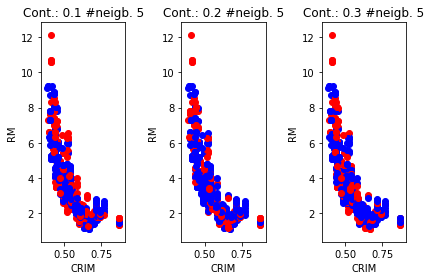

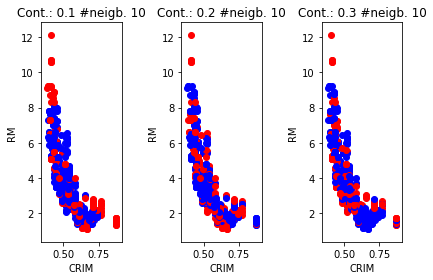

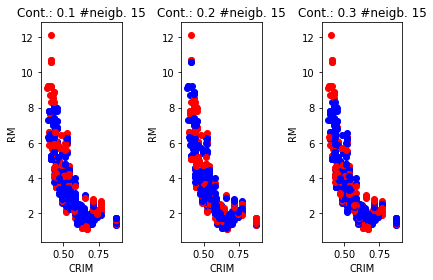

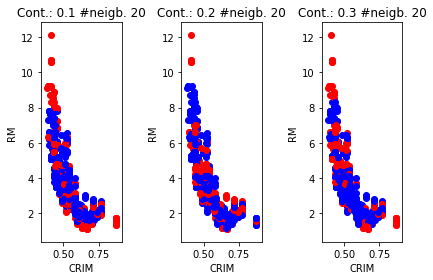

In [17]:
# We use different values for the number of neighbours for LOF
for no_n in range(5,21,5):
    # We use different values for the contamination rate
    # We loop over pairs, where i is used for the subplots
    for i, contam in [(1, 0.1), (2, 0.2), (3, 0.3)]:
        plt.subplot(1, 3, i) 

        loc = LocalOutlierFactor(n_neighbors = no_n, contamination = 0.3)
        outliers_loc = loc.fit_predict(X_2)
        X_2['outlier_lof'] = pd.DataFrame(outliers_loc)
        for index, obs in X_2.iterrows():
            if obs['outlier_lof'] > 0:
                plt.scatter(obs[0], obs[1], color='blue')
            else:
                plt.scatter(obs[0], obs[1], color='red')
        plt.xlabel('CRIM')
        plt.ylabel('RM')
        plt.title('Cont.: '+str(contam)+" #neigb. " + str(no_n))
    plt.tight_layout()
    plt.show()

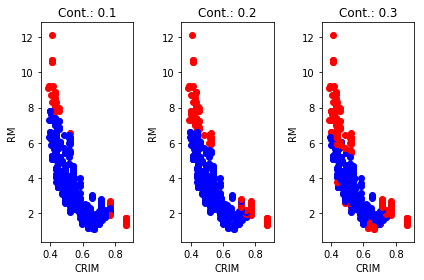

In [18]:
for i, contam in [(1, 0.1), (2, 0.2), (3, 0.3)]:
    plt.subplot(1, 3, i)
    ee = EllipticEnvelope(contamination = contam)
    outliers_ee = ee.fit_predict(X_2)
    X_2['outlier_ee'] = pd.DataFrame(outliers_ee)
    for index, obs in X_2.iterrows():
        if obs['outlier_ee'] > 0:
            plt.scatter(obs[0], obs[1], color='blue')
        else:
            plt.scatter(obs[0], obs[1], color='red')
    plt.xlabel('CRIM')
    plt.ylabel('RM')
    plt.title('Cont.: '+str(contam))
plt.tight_layout()
plt.show()

Notice how both approaches produce different results. The Gaussian distribution-based approach clearly targets observations at the edges of the distribution, while the LOF approach takes into account density, resulting in more spreadout outlier detection. The more neighbours used, the more close-knit the outliers are.